# Introduction to TensorFlow v2 : Basics

### Importing and printing the versions

In [1]:
import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version: {}".format(tf.keras.__version__))

TensorFlow version: 2.3.1
Eager execution is: True
Keras version: 2.4.0


### TensorFlow Variables

[Tensors](https://www.tensorflow.org/guide/tensor) are multi-dimensional arrays in TensorFlow. But, Tensors are immutable in nature. [Variables](https://www.tensorflow.org/guide/variable) are a way to store data which can be manipulated and changed easily. Variables are automatically placed on the fastest compatible device for it's datatype. For ex: If GPU is found, the tensors are automatically placed on GPU directly. 

In [2]:
var = 1

# Defining a Tensorflow Variables
ten = tf.Variable(7) 
another_tensor = tf.Variable([[1, 2],[3, 4]]) 

In [3]:
var, ten, another_tensor

(1,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=7>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>)

### Creating new Variables

In [4]:
f1 = tf.Variable(100.6)
print(f1)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=100.6>


### Assigning values to existing Variables

In [5]:
# Assign and print the Data-Type
print(f1.assign(25))
print(f1.dtype)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=25.0>
<dtype: 'float32'>


In [6]:
f2 = tf.Variable(7, dtype = tf.float64)
print(f2.dtype)

<dtype: 'float64'>


In [7]:
# Creating a TensorFlow constant - Value cannot be changed in future
constant_var = tf.constant(10)
print(constant_var)

tf.Tensor(10, shape=(), dtype=int32)


### Extracting the value from a Tensor and formatting like a Numpy array using .numpy()

In [8]:
constant_var.numpy()

10

### Rank and Shape of Tensor

About [Rank and Shape](https://www.tensorflow.org/guide/tensor#about_shapes) in TensorFlow

In [9]:
tf.rank(another_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [10]:
tf.shape(another_tensor)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2])>

In [11]:
new_tensor = tf.Variable([ [ [0., 1., 2.], [3., 4., 5.] ], [ [6., 7., 8.], [9., 10., 11.] ] ]) 
print(new_tensor.shape)
print(tf.rank(new_tensor))

(2, 2, 3)
tf.Tensor(3, shape=(), dtype=int32)


### Reshaping Tensors

In [12]:
new_reshape = tf.reshape(new_tensor, [2, 6]) 
recent_reshape = tf.reshape(new_tensor, [1, 12])

In [13]:
print(new_reshape)
print(recent_reshape)

tf.Tensor(
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]], shape=(2, 6), dtype=float32)
tf.Tensor([[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]], shape=(1, 12), dtype=float32)


### Broadcasting Feature

In [14]:
new_tensor + 4

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 4.,  5.,  6.],
        [ 7.,  8.,  9.]],

       [[10., 11., 12.],
        [13., 14., 15.]]], dtype=float32)>

In [15]:
new_tensor - 4

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[-4., -3., -2.],
        [-1.,  0.,  1.]],

       [[ 2.,  3.,  4.],
        [ 5.,  6.,  7.]]], dtype=float32)>

In [16]:
new_tensor * 4

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 0.,  4.,  8.],
        [12., 16., 20.]],

       [[24., 28., 32.],
        [36., 40., 44.]]], dtype=float32)>

### Matrix Multiplication

In [17]:
new_tensor * new_tensor

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[  0.,   1.,   4.],
        [  9.,  16.,  25.]],

       [[ 36.,  49.,  64.],
        [ 81., 100., 121.]]], dtype=float32)>

In [18]:
u = tf.constant([[5, 6, 7]])
v = tf.constant([[8, 9, 0]])
print('Matrix Multiplication - Transpose')
print(tf.matmul(u, tf.transpose(a=v)))

Matrix Multiplication - Transpose
tf.Tensor([[94]], shape=(1, 1), dtype=int32)


### Type Casting

In [19]:
int_tensor = tf.cast(ten, dtype=tf.float32)
print(int_tensor)

tf.Tensor(7.0, shape=(), dtype=float32)


### Arithmetic Operations

In [20]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

print('Addition - {}'.format(c))
print('Square Root - {}'.format(d))
print('Exponent - {}'.format(e))

Addition - [[ 2.152709  -1.7924592]
 [ 2.1677308  2.0514646]]
Square Root - [[4.634156  3.2129102]
 [4.6990566 4.208507 ]]
Exponent - [[102.941025  24.851303]
 [109.8435    67.25606 ]]


# TensorFlow v2 Functions

### Squared Difference Function

In [21]:
#Squared Difference Function
x = [2, 4, 6, 8, 12]
y = 6

#(x-y)*(x-y)
result = tf.math.squared_difference(x, y)
result

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([16,  4,  0,  4, 36])>

### Reduce Mean

In [22]:
numbers = tf.constant([[6., 9.], [3., 5.]])
print(numbers)

tf.Tensor(
[[6. 9.]
 [3. 5.]], shape=(2, 2), dtype=float32)


In [23]:
tf.reduce_mean(input_tensor = numbers)

<tf.Tensor: shape=(), dtype=float32, numpy=5.75>

### Mean across columns

In [24]:
# Reduce rows -> Find mean across columns
#(6. + 3.)/2, (9. + 5.)/2
print(tf.reduce_mean(input_tensor = numbers, axis = 0))

tf.Tensor([4.5 7. ], shape=(2,), dtype=float32)


In [25]:
# (6. + 3.)/2, (9. + 5.)/2
print(tf.reduce_mean(input_tensor = numbers, axis = 0, keepdims = True))

tf.Tensor([[4.5 7. ]], shape=(1, 2), dtype=float32)


### Mean across rows

In [26]:
# Reduce columns -> Find mean across rows
#(6. + 9.)/2, (3. + 5.)/2
print(tf.reduce_mean(input_tensor = numbers, axis = 1))

tf.Tensor([7.5 4. ], shape=(2,), dtype=float32)


In [27]:
# (6. + 9.)/2, (3. + 5.)/2
print(tf.reduce_mean(input_tensor = numbers, axis = 1, keepdims = True))

tf.Tensor(
[[7.5]
 [4. ]], shape=(2, 1), dtype=float32)


### Generating normal distribution in a tensor

In [28]:
print(tf.random.normal(shape = (3, 2), mean = 10, stddev = 2, dtype = tf.float32, seed = None, name = None))

tf.Tensor(
[[11.67767  10.190011]
 [ 4.638527 10.937168]
 [11.941066  8.749236]], shape=(3, 2), dtype=float32)


### Generating uniform distribution in a tensor

In [29]:
tf.random.uniform(shape = (3, 2),  minval = 0, maxval = 1, dtype = tf.float32, seed = None, name = None)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.02733564, 0.16111183],
       [0.2704568 , 0.02369511],
       [0.16415834, 0.68207777]], dtype=float32)>

### Random Seed in Tensorflow

In [30]:
print('Random Seed - 11\n')
tf.random.set_seed(11)
random_1 = tf.random.uniform(shape = (2, 2), maxval = 7, dtype = tf.int32)
random_2 =  tf.random.uniform(shape = (2, 2), maxval = 7, dtype = tf.int32)
print(random_1) 
print(random_2)
print('\n')

print('Random Seed - 12\n')
tf.random.set_seed(12)
random_1 = tf.random.uniform(shape = (2, 2), maxval = 7, dtype = tf.int32)
random_2 =  tf.random.uniform(shape = (2, 2), maxval = 7, dtype = tf.int32)
print(random_1) 
print(random_2)
print('\n')

print('Random Seed - 11\n')
tf.random.set_seed(11)
random_1 = tf.random.uniform(shape = (2, 2), maxval = 7, dtype = tf.int32)
random_2 =  tf.random.uniform(shape = (2, 2), maxval = 7, dtype = tf.int32)
print(random_1) 
print(random_2)

Random Seed - 11

tf.Tensor(
[[4 3]
 [0 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[6 3]
 [6 3]], shape=(2, 2), dtype=int32)


Random Seed - 12

tf.Tensor(
[[0 4]
 [2 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0 4]
 [0 1]], shape=(2, 2), dtype=int32)


Random Seed - 11

tf.Tensor(
[[4 3]
 [0 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[6 3]
 [6 3]], shape=(2, 2), dtype=int32)


### Max, Min and Indices

In [31]:
tensor_m = tf.constant([2, 20, 15, 32, 77, 29, -16, -51, 29])
print(tensor_m)

# Max argument
index = tf.argmax(input = tensor_m)
print('Index of max: {}\n'.format(index))
print('Max element: {}'.format(tensor_m[index].numpy()))

tf.Tensor([  2  20  15  32  77  29 -16 -51  29], shape=(9,), dtype=int32)
Index of max: 4

Max element: 77


In [32]:
print(tensor_m)

# Min argument
index = tf.argmin(input = tensor_m)
print('Index of minumum element: {}\n'.format(index))
print('Minimum element: {}'.format(tensor_m[index].numpy()))

tf.Tensor([  2  20  15  32  77  29 -16 -51  29], shape=(9,), dtype=int32)
Index of minumum element: 7

Minimum element: -51


# TensorFlow v2 : Advanced

### Computing gradients with GradientTape - Automatic Differentiation

TensorFlow v2 has this API for recording gradient values based on the values computed in the forward pass with respect to inputs. Since we need values to be remembered during the forward pass, the tf.GradientTape provides us a way to automatically differentiate a certain function wrt to the input variable specified. To read more on Auto Diiferentiation in TensorFlow v2 click [here]https://www.tensorflow.org/guide/autodiff).

In [33]:
x = tf.random.normal(shape=(2, 2))
y = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
    
    # Start recording the history of operations applied to x
    tape.watch(x)
    
    # Do some math using x and y
    z = tf.sqrt(tf.square(x) + tf.square(y))  
    
    # What's the gradient of z with respect to x
    dz = tape.gradient(z, x)
    print(dz)

tf.Tensor(
[[0.57269156 0.9751479 ]
 [0.53572375 0.8537005 ]], shape=(2, 2), dtype=float32)


tf.GradientTape API automatically watches the function to be differentiated, no need to explicitly mention/run tape.watch()

In [34]:
x = tf.Variable(x)

with tf.GradientTape() as tape:
    
    # Doing some calculations using x and y
    z = tf.sqrt(tf.square(x) + tf.square(y))
    
    # Getting the gradient of z wrt x
    dz = tape.gradient(z, x)
    print(dz)

tf.Tensor(
[[0.57269156 0.9751479 ]
 [0.53572375 0.8537005 ]], shape=(2, 2), dtype=float32)


We can perform differentiation in chains also, using two tapes!

In [35]:
with tf.GradientTape() as outer_tape:
    
    with tf.GradientTape() as tape:
        
        # Computation using x and y
        z = tf.sqrt(tf.square(x) + tf.square(y))
        
        # First differentiation of z wrt x
        dz = tape.gradient(z, x)
        
    # Second differentiation of z wrt x   
    dz2 = outer_tape.gradient(dz, x)
    print(dz2)

tf.Tensor(
[[0.47573683 0.04185158]
 [1.0060201  0.24222922]], shape=(2, 2), dtype=float32)


### Tensorflow v2 Graph Function

Read [here](https://www.tensorflow.org/guide/intro_to_graphs) for more information on Computation Graphs and TensorFlow Functions of TensorFlow v1

In [36]:
#Normal Python function
def f1(x, y):
    return tf.reduce_mean(input_tensor=tf.multiply(x ** 2, 5) + y**2)

#Converting that into Tensorflow Graph function
f2 = tf.function(f1)

x = tf.constant([7., -2.])
y = tf.constant([8., 6.])

#Funtion 1 and function 2 return the same value, but function 2 executes as a TensorFlow graph
assert f1(x,y).numpy() == f2(x,y).numpy()

ans = f1(x,y)
print(ans)

ans = f2(x,y)
print(ans)

tf.Tensor(182.5, shape=(), dtype=float32)
tf.Tensor(182.5, shape=(), dtype=float32)


# TensorFlow v2 : Linear Regression and tf.function

### Let's see what is the importance of tf.function with a small example of Linear Regression

In [37]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))

# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
    return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
        
        # Note that `tape.gradient` works with a list as well (w, b).
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
        
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    
    return loss

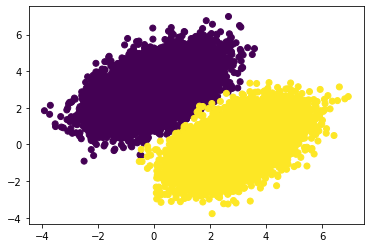

In [38]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'), np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [39]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch(x, y)
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0806
Epoch 1: last batch loss = 0.0757
Epoch 2: last batch loss = 0.0427
Epoch 3: last batch loss = 0.0150
Epoch 4: last batch loss = 0.0360
Epoch 5: last batch loss = 0.0294
Epoch 6: last batch loss = 0.0151
Epoch 7: last batch loss = 0.0229
Epoch 8: last batch loss = 0.0184
Epoch 9: last batch loss = 0.0294


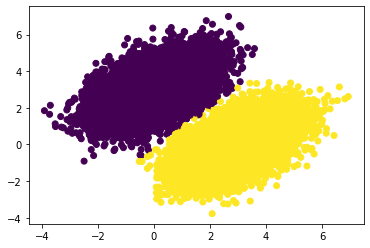

In [40]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

### Analysizing the code run time

TensorFlow v2 with Eager Execution

In [41]:
import time

t0 = time.time()
for epoch in range(20):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.400 s


Adding the @tf.function to convert the function into a static graph (TensorFlow v1)

In [42]:
@tf.function
def train_on_batch_tf(x, y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss

Running using the Static Graph method 

In [43]:
t0 = time.time()
for epoch in range(20):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch_tf(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.259 s


## There is a huge decrease in the time taken per epoch!!!

## Eager execution is great for debugging and printing results line-by-line, but when it's time to scale, static graphs are a researcher's best friends.